In [55]:
%load_ext autoreload
%autoreload 2
from Functions import image_processing as ip
import skimage.io as sk
import numpy as np
from Functions import seed_detection as sd
from Functions import unseeded_region_growing as urg
from Functions import seeded_region_growing as srg
from Functions import region_merging as rm
from Functions import dice_score as ds
from PIL import Image
from Functions import visualization as vis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
image = sk.imread("Data/NIH3T3/img/dna-42.png")
image_urg_merged = sk.imread("Result_Pictures/Unseeded_Region_Growing/NIH3T3/dna-42_merging_0.07_10000_median_3.tif")
#ip.show_image(image_urg_merged, 15, 8)
ground_truth = sk.imread("Data/NIH3T3/gt/42.png")
ground_truth_clipped = ip.image_clipping(ground_truth.copy(), 0, 1)

In [41]:
score = ds.evaluate_accuracy_weighted(image_urg_merged, ground_truth)
#print(score)
score2 = ds.evaluate_accuracy_unweighted(image_urg_merged, ground_truth)
#print(score2)
#ip.show_image(image_urg_merged, 15, 8)
#ip.show_image(ground_truth_clipped, 15, 8)
#ip.show_image(ip.image_clipping(image_urg_merged, 1, 2), 15, 8)
#test5 = ip.image_clipping(image_urg_merged, 1, 2)

In [ ]:
#im = Image.fromarray(test5)
#im.save("Result_Pictures/Unseeded_Region_Growing/NIH3T3/dna-42_clipped.tif")

In [ ]:
image_dna_0_srg = sk.imread("Result_Pictures/Seeded_Region_Growing/NIH3T3/dna-0_merged_0.1_400.tif")
gt_dna_0 = sk.imread("Data/NIH3T3/gt/0.png")
#ip.show_image(image_dna_0_srg, 15, 8)
#ip.show_image(gt_dna_0, 15, 8)
#print(ds.evaluate_accuracy_weighted(image_dna_0_srg, gt_dna_0))

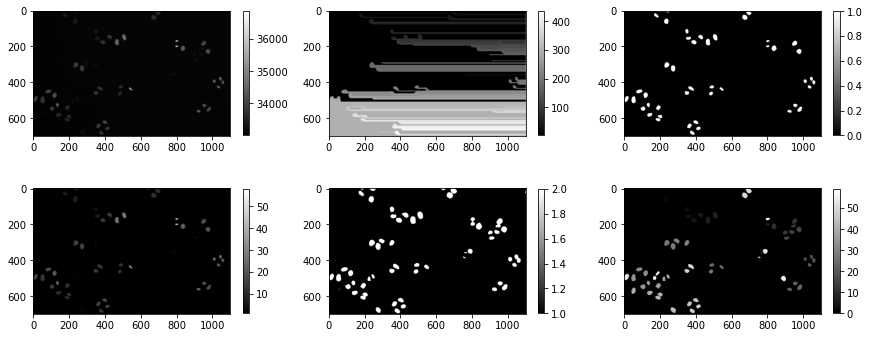

KeyboardInterrupt: 

In [78]:
vis.results_hela()